In [49]:
import os
import numpy as np
from numpy.random import rand
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
print("Modules imported")

Modules imported


In [2]:
df = pd.read_csv('fetalHealthData.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
X_df = df.drop(["fetal_health"], axis=1)
y_df = df["fetal_health"]

X = X_df.to_numpy()
y = y_df.to_numpy()
print(X)
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

[[1.20e+02 0.00e+00 0.00e+00 ... 1.21e+02 7.30e+01 1.00e+00]
 [1.32e+02 6.00e-03 0.00e+00 ... 1.40e+02 1.20e+01 0.00e+00]
 [1.33e+02 3.00e-03 0.00e+00 ... 1.38e+02 1.30e+01 0.00e+00]
 ...
 [1.40e+02 1.00e-03 0.00e+00 ... 1.52e+02 4.00e+00 1.00e+00]
 [1.40e+02 1.00e-03 0.00e+00 ... 1.51e+02 4.00e+00 1.00e+00]
 [1.42e+02 2.00e-03 2.00e-03 ... 1.45e+02 1.00e+00 0.00e+00]]
X.shape: (2126, 21)
y.shape: (2126,)


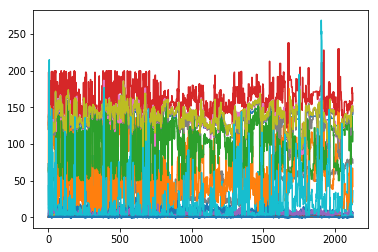

In [6]:
plt.plot(X)
plt.show()

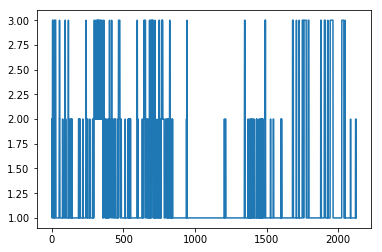

In [7]:
plt.plot(y)
plt.show()

In [8]:
def featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    """
    # You need to set these values correctly
    col = X.shape[1]
    mu = np.zeros(col)
    sigma = np.ones(col)

    # =========================== YOUR CODE HERE =====================
    lin = X.shape[0]
    col = X.shape[1]
    X_norm = X.copy()
    
    for j in range(col):
        mu[j] = np.mean(X[:, j])
        sigma[j] = np.std(X[:, j])
        for i in range(lin):
            X_norm[i][j] = (X[i][j] - mu[j]) / sigma[j]
    # ================================================================
    return X_norm, mu, sigma

In [9]:
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [1.33303857e+02 3.17826905e-03 9.48071496e-03 4.36641580e-03
 1.88946378e-03 3.29256820e-06 1.58513641e-04 4.69901223e+01
 1.33278457e+00 9.84666040e+00 8.18762935e+00 7.04459078e+01
 9.35794920e+01 1.64025400e+02 4.06820320e+00 3.23612418e-01
 1.37452023e+02 1.34610536e+02 1.38090310e+02 1.88080903e+01
 3.20319849e-01]
Computed standard deviation: [9.83852958e+00 3.86468172e-03 4.66548681e-02 2.94537618e-03
 2.95951230e-03 5.72863614e-05 5.89808754e-04 1.71887698e+01
 8.83033586e-01 1.83925525e+01 5.62692278e+00 3.89465301e+01
 2.95532594e+01 1.79399624e+01 2.94869189e+00 7.05893300e-01
 1.63774362e+01 1.55899285e+01 1.44631862e+01 2.89708201e+01
 6.10684956e-01]


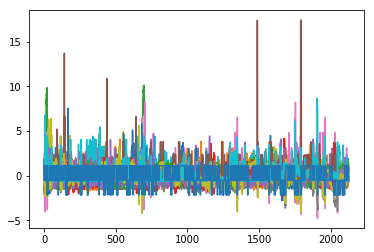

In [10]:
plt.plot(X_norm)
plt.show()

In [11]:
X_train, X_cv_test, y_train, y_cv_test = train_test_split(X, y, train_size=0.6, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_cv_test, y_cv_test, test_size=0.5, random_state=42)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(1275, 21)
(425, 21)
(426, 21)


In [12]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix.
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    g = 1 / (1 + np.exp(-z))
    # =============================================================
    return g

In [13]:
def sigmoidGradient(z):
    """
    Computes the gradient of the sigmoid function evaluated at z. 
    This should work regardless if z is a matrix or a vector. 
    In particular, if z is a vector or matrix, you should return
    the gradient for each element.
    
    Parameters
    ----------
    z : array_like
        A vector or matrix as input to the sigmoid function. 
    
    Returns
    --------
    g : array_like
        Gradient of the sigmoid function. Has the same shape as z. 
    """
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    g = np.exp(-z) / (1 + np.exp(-z)) ** 2
    # =============================================================
    return g

In [14]:
def getOneHot(l):
    l = (np.rint(l)).astype(int)
    
    onehot_encoded = np.zeros((l.size, l.max()))
    
    for i, value in enumerate(l):
        encodedValue = np.array([0 for _ in range(int(l.max()))])
        encodedValue[int(value - 1)] = 1
        onehot_encoded[i] = encodedValue
    
    return onehot_encoded

In [15]:
class Layer:
    
    def __init__(self, num_inputs, num_neurons):
        # num_inputs: number of nodes in the previous layer
        # num_neurons: number of neurons of the current layer
        
        # scale random weights
        lower, upper = -(1.0 / np.sqrt(num_inputs)), (1.0 / np.sqrt(num_inputs))
        
        # apply xavier initialization
        self.theta = lower + np.random.randn(num_inputs, num_neurons) * (upper - lower)
    
    def forward_propagation(self, current_inputs):
        self.output = np.dot(current_inputs, self.theta)
        
    def calculate_cost(self, output, y, num_labels):
        ones_output = np.ones_like(output)
        ones_y= np.ones_like(y)

        J = 0
        m = y.size
        for c in range(num_labels):
            v1 = np.dot(np.log(output.T), y == c)
            v2 = np.dot(np.log((ones_output - output).T), ones_y - (y == c))
            J = J + ((v1 + v2) / (-m)).min()
        
        self.J = J

In [16]:
class Activation:
    
    def apply_activation_function(self, current_inputs):
        self.output = sigmoid(current_inputs)

In [17]:
def nnCostFunction(input_layer_size,
                   hidden_layer_size,
                   num_labels,
                   X, y, lambda_=0.0):
    """
    Implements the neural network cost function and gradient for a two layer neural 
    network which performs classification.
    
    Parameters
    ----------
    input_layer_size : int
        Number of features for the input layer. 
    
    hidden_layer_size : int
        Number of hidden units in the second layer.
    
    num_labels : int
        Total number of labels, or equivalently number of units in output layer. 
    
    X : array_like
        Input dataset. A matrix of shape (m x input_layer_size).
    
    y : array_like
        Dataset labels. A vector of shape (m,).
    
    lambda_ : float, optional
        Regularization parameter.
 
    Returns
    -------
    J : float
        The computed value for the cost function at the current weight values.
    
    grad : array_like
        An "unrolled" vector of the partial derivatives of the concatenation of
        neural network weights Theta1 and Theta2.
    """

    # Setup some useful variables
    m = y.size
         
    # You need to return the following variables correctly 
    J = 0

    # ====================== YOUR CODE HERE ======================
        
    # layer 0 dimensions
    numNeuronsLayer0 = input_layer_size

    # layer 1 dimensions
    numInputsLayer1 = numNeuronsLayer0
    numNeuronsLayer1 = hidden_layer_size

    # output layer dimensions
    numInputsOutputLayer = numNeuronsLayer1
    numNeuronsOutputLayer = num_labels

    # create layers
    layer1 = Layer(numInputsLayer1, numNeuronsLayer1)
    activationFunctionLayer1 = Activation()
    
    outputLayer = Layer(numInputsOutputLayer, numNeuronsOutputLayer)
    activationFunctionOutputLayer = Activation()
    
    # extract thetas
    theta1 = layer1.theta
    theta2 = outputLayer.theta
    
    # forward propagation
    layer1.forward_propagation(X)
    activationFunctionLayer1.apply_activation_function(layer1.output)
    z_2 = layer1.output
    a_2 = activationFunctionLayer1.output
    
    outputLayer.forward_propagation(a_2)
    activationFunctionOutputLayer.apply_activation_function(outputLayer.output)
    a_3 = activationFunctionOutputLayer.output
    
    outputLayer.calculate_cost(a_3, y, num_labels)
    J = outputLayer.J
    
    # backpropagation
    one_hot_Y = getOneHot(y)
    delta_3 = a_3 - one_hot_Y
    delta_2 = np.matmul(delta_3, theta2.T) * sigmoidGradient(z_2)
    
    theta1_grad = np.matmul(X.T, delta_2) / m
    theta2_grad = np.matmul(a_2.T, delta_3) / m
    
    # regularization
    theta1_grad += lambda_ * theta1 / m
    theta2_grad += lambda_ * theta2 / m
    
    # ================================================================
    # Unroll gradients
    grad = np.concatenate([theta1_grad.ravel(), theta2_grad.ravel()])

    return J, grad.ravel()

In [18]:
inputLayerSize = X_train.shape[1]
hiddenLayerSize = 10
numLabels = 3
lambda_ = 1

J, grad = nnCostFunction(inputLayerSize, hiddenLayerSize, numLabels, X_train, y_train, lambda_)
print('Cost: %.6f ' % J)
print(f'Gradient: {grad}')

Cost: 2.071034 
Gradient: [ 1.59655185e-02 -2.01705135e-04 -4.23938872e-04 -2.26867112e-04
 -9.35412541e-05 -3.69573749e-04 -7.03383815e-05 -5.07780792e-04
  2.49255548e-04             nan  2.28444834e-04 -2.16659771e-04
  2.13306994e-04  3.87861407e-05 -4.22327063e-05 -2.97091447e-04
  4.76772014e-04 -3.20870404e-04  1.41933914e-05             nan
 -1.33910830e-04 -1.18414027e-04 -2.17265716e-04  2.20076592e-04
  4.99022442e-04 -3.44728511e-04  4.14953287e-04 -2.77012962e-04
 -4.52792889e-04             nan -5.56717202e-04  1.17394233e-05
 -1.02283868e-04 -4.98180150e-04  6.39651574e-06 -1.50736118e-04
 -2.81508230e-04  1.61538179e-04 -4.23858819e-04             nan
 -2.48246360e-05  1.15082205e-04 -1.62443817e-04 -8.19353181e-04
 -5.62398204e-05 -8.41315063e-04 -4.93915623e-04  4.49194499e-05
 -5.15494134e-04             nan -3.53642993e-04 -6.66117412e-04
 -8.76217449e-05 -2.67342166e-04  1.99184675e-04 -3.72489719e-04
 -2.35895143e-04  1.55997142e-04  3.16241361e-04             nan

C:\Users\40752\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
C:\Users\40752\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
C:\Users\40752\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square
C:\Users\40752\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [48]:
# neural networks
NNmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(hiddenLayerSize, activation='relu', input_shape=(inputLayerSize,)),
    tf.keras.layers.Dense(numLabels, activation='relu'),
])

# Compile the model
NNmodel.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
y_OneHot = getOneHot(y_train)
history = NNmodel.fit(X_train, y_OneHot, epochs=50, validation_split=0.2)

# Evaluate the model
y_OneHot = getOneHot(y_test)
loss, accuracy = NNmodel.evaluate(X_test, y_OneHot)
print('NN test accuracy:', accuracy)

Epoch 1/50
32/32 [==============================] - 1s 7ms/step - loss: 3.6374 - accuracy: 0.7627 - val_loss: 2.2171 - val_accuracy: 0.8000
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 1.5753 - accuracy: 0.7627 - val_loss: 0.8952 - val_accuracy: 0.7882
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8212 - accuracy: 0.7608 - val_loss: 0.7564 - val_accuracy: 0.8000
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7483 - accuracy: 0.7618 - val_loss: 0.7106 - val_accuracy: 0.8000
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7248 - accuracy: 0.7627 - val_loss: 0.6984 - val_accuracy: 0.8000
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.7618 - val_loss: 0.6936 - val_accuracy: 0.8000
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.7627 - val_loss: 0.6931 - val_accuracy: 0.8000
Epoch 8/50
32/32 [==

In [44]:
# Logistic regression
logisticRegressionModel = tf.keras.Sequential([
    tf.keras.layers.Dense(hiddenLayerSize, activation='relu', input_shape=(inputLayerSize,)),
    tf.keras.layers.Dense(numLabels, activation='softmax')
])

# Compile the model
logisticRegressionModel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
y_ones = np.ones(y_train.shape)
history = logisticRegressionModel.fit(X_train, y_train - y_ones, epochs=50, validation_split=0.2)

# Evaluate the model
y_ones = np.ones(y_test.shape)
loss, accuracy = logisticRegressionModel.evaluate(X_test, y_test - y_ones)
print('Logistic regression test accuracy:', accuracy)

Epoch 1/50
32/32 [==============================] - 1s 7ms/step - loss: 4.7910 - accuracy: 0.6608 - val_loss: 3.0511 - val_accuracy: 0.6627
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 3.7035 - accuracy: 0.6647 - val_loss: 2.5377 - val_accuracy: 0.7922
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 3.1206 - accuracy: 0.7088 - val_loss: 2.2093 - val_accuracy: 0.6784
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 2.4714 - accuracy: 0.7118 - val_loss: 1.6760 - val_accuracy: 0.7529
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 1.9973 - accuracy: 0.7235 - val_loss: 1.3116 - val_accuracy: 0.7804
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 1.5815 - accuracy: 0.7500 - val_loss: 1.0916 - val_accuracy: 0.7961
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 1.2902 - accuracy: 0.7755 - val_loss: 1.0606 - val_accuracy: 0.7765
Epoch 8/50
32/32 [==

In [70]:
# Logistic regression
logisticRegressionModel2 = LogisticRegression(max_iter=3000, multi_class='ovr')

y_ones = np.ones(y_train.shape)
logisticRegressionModel2.fit(X_train, y_train - y_ones)

y_ones = np.ones(y_test.shape)
logisticRegressionModel2.score(X_test, y_test - y_ones)

0.8896713615023474